Importing all the necessary modules that are required for the task

In [9]:
#Importing all the neccessary modules required for the task
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


TASK 1: EXPLORTATORY DATA ANALYSIS

In [10]:
#Loading the data into a data frame and displaying first 5 rows
df=pd.read_csv(r"dataset_aiml_task\data.csv")
print(df.head())
pixels=df.drop('label',axis=1)
labels=df['label']

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

Now its time to visualize the dataset, I will visualize dataset for each category.

1>First we will visualize the class distribution of the dataset to check if the dataset is balanaced or imbalanced.
2>Ploting random sample images of each categories
3>Calculate and display the mean image for each digit to see the average appearance of each digit.
From this three visualization we get the idea of how images of each category will look like and which part of the images varies highly from the mean and which one varies less.

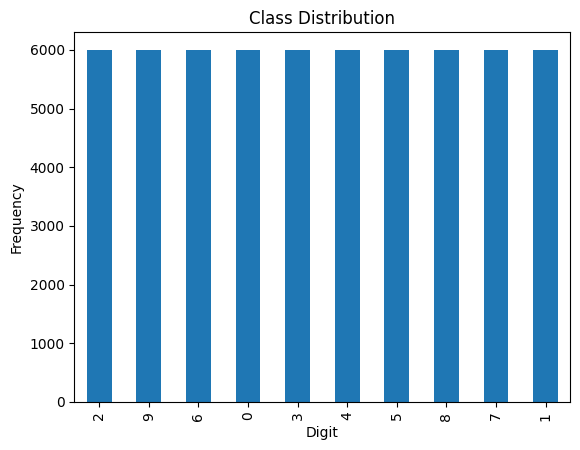

In [12]:
#Class distribution visualization
label_counts=labels.value_counts()
label_counts.plot(kind="bar")
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.show()
#From the output its clear that that the dataset is balanced


Random image for each digit category


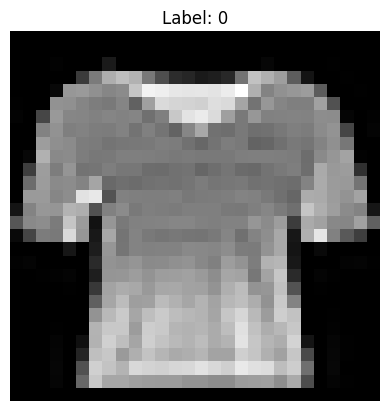

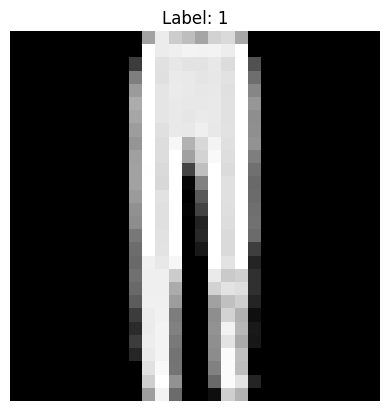

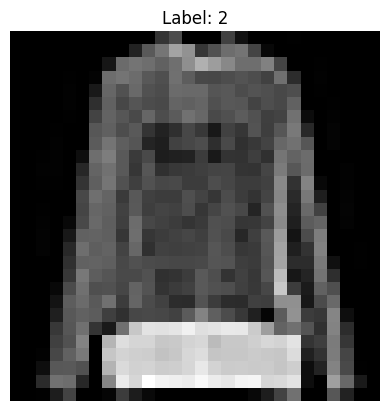

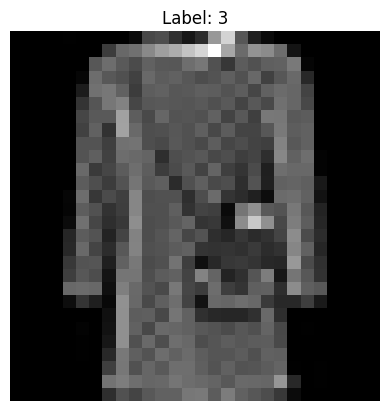

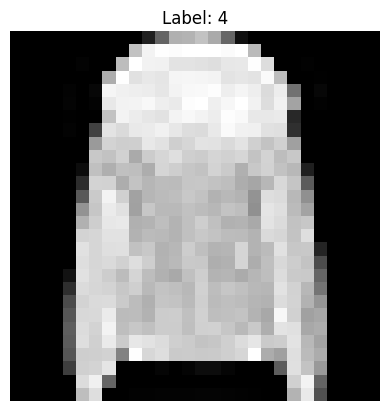

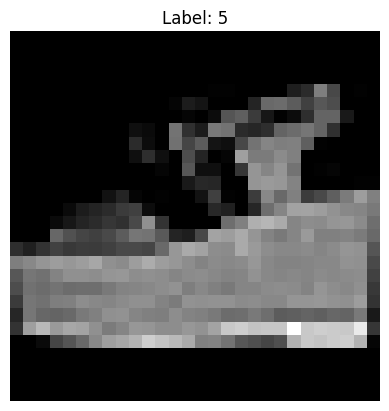

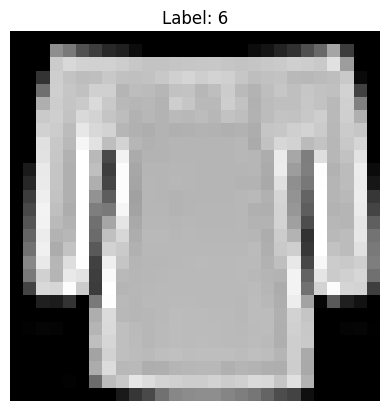

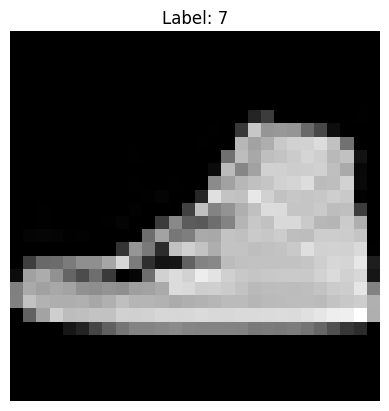

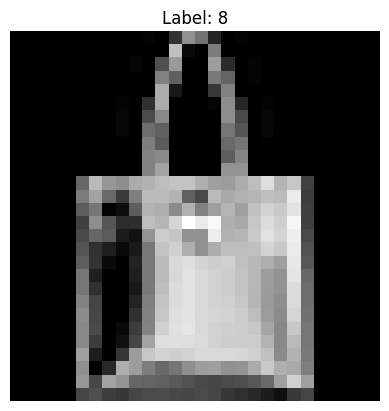

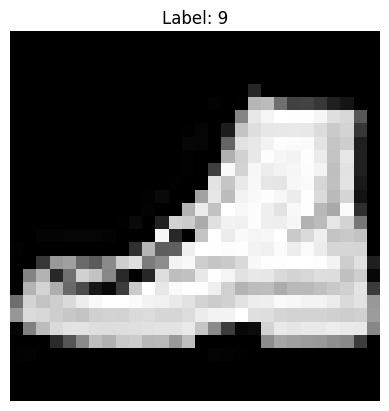

Mean image for each digit category


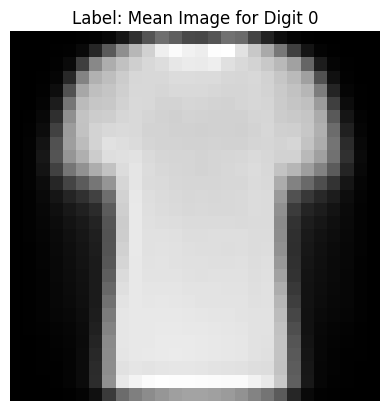

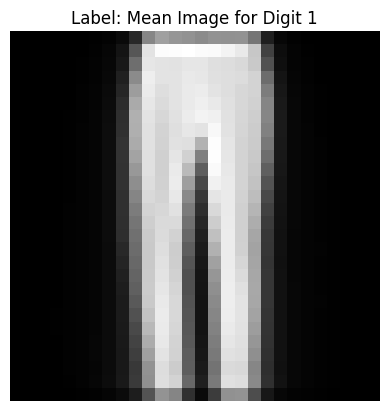

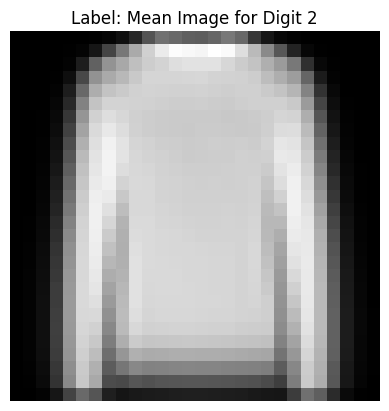

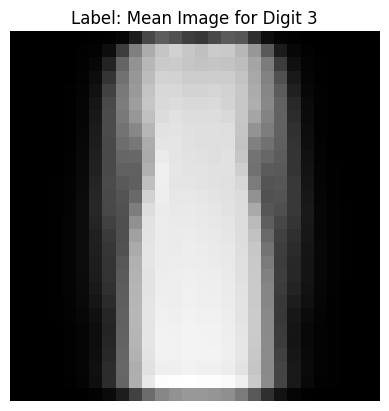

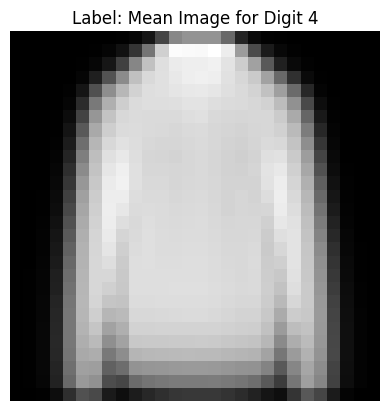

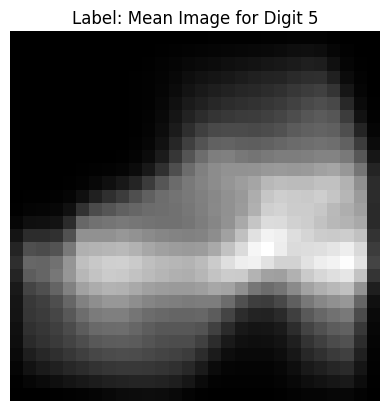

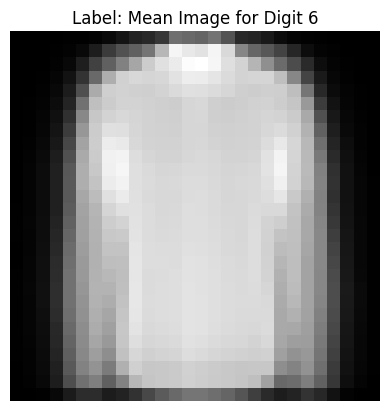

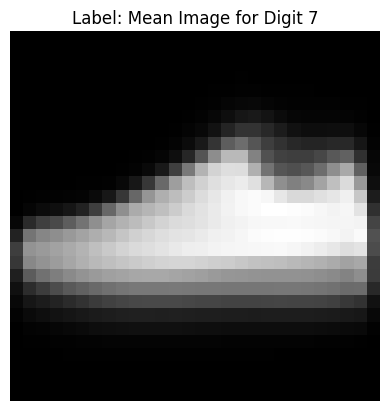

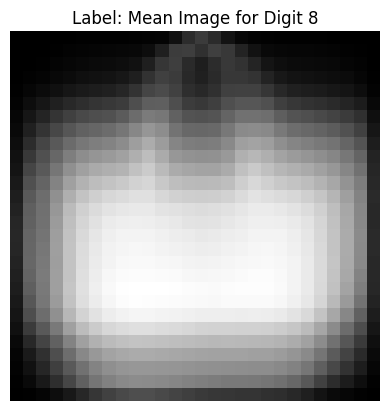

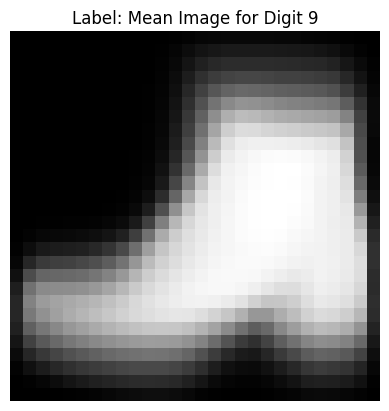

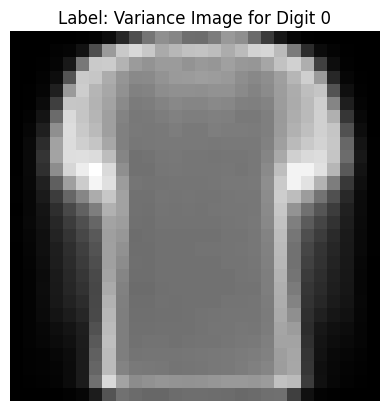

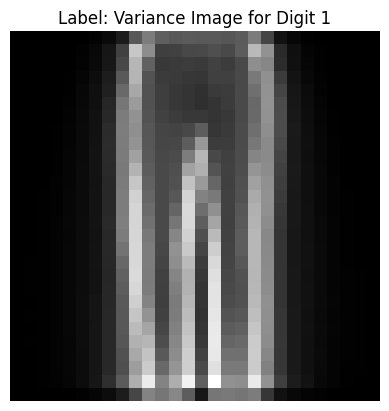

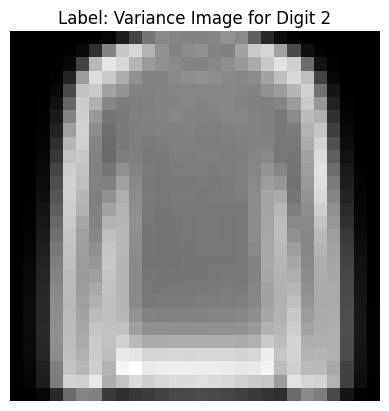

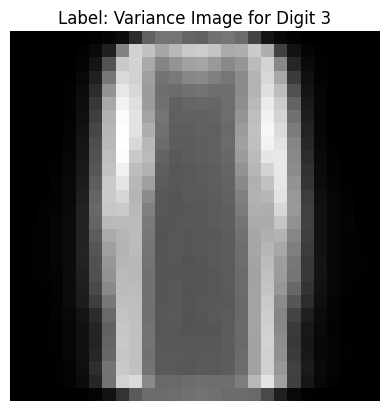

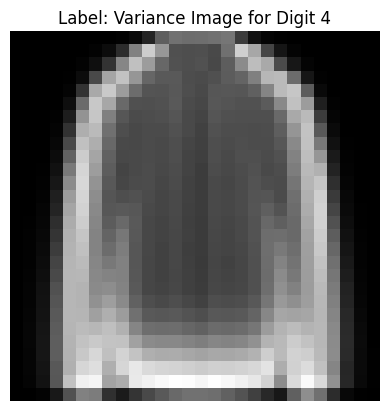

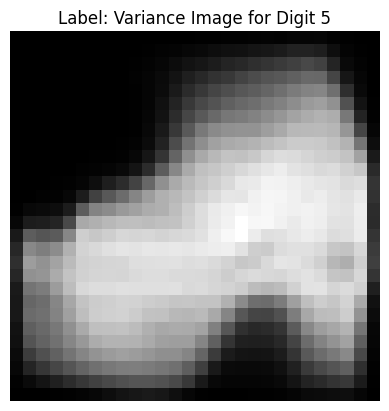

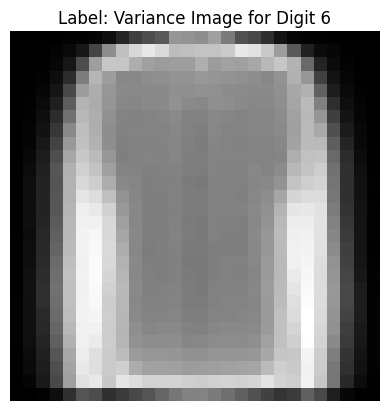

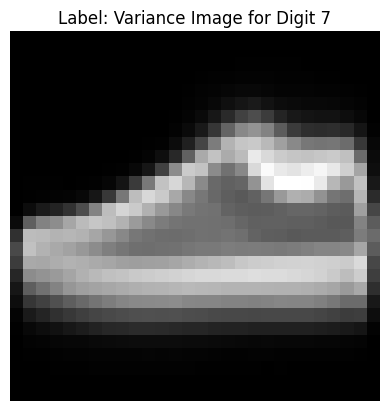

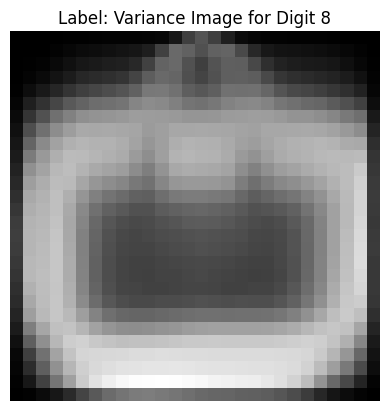

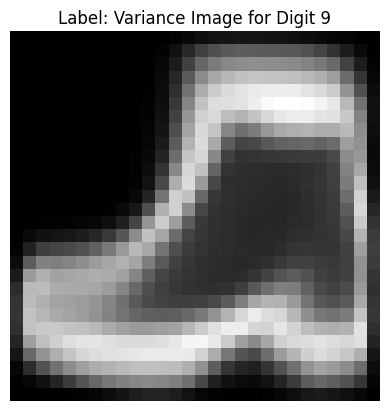

In [25]:
def show_image(image_data,label):
    plt.imshow(image_data.values.reshape(28, 28), cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

print("Random image for each digit category")
#Displaying random sample image of each category
for digit in range(10):
    digit_data = pixels[labels == digit]
    index = np.random.randint(0, digit_data.shape[0])
    show_image(digit_data.iloc[index], digit)
print("Mean image for each digit category")
# Calculate and display the mean image for each digit category
for digit in range(10):
    digit_data = pixels[labels == digit]
    mean_image = digit_data.mean(axis=0)
    show_image(mean_image, f'Mean Image for Digit {digit}')
# Calculate and display the variance of pixel values for each digit
for digit in range(10):
    digit_data=pixels[labels==digit]
    variance_image = digit_data.var(axis=0)
    show_image(variance_image,f'Variance Image for Digit {digit}')

Now we will generate the summary statistics for pixel values of each category to comprehend data characteristics.

In [ ]:
category_summary_stats = {}
# Calculate summary statistics for each digit category (0-9)
for digit in range(10):
    digit_data = pixels[labels == digit]
    summary_stats = digit_data.describe()
    category_summary_stats[digit] = summary_stats

# Display summary statistics for each digit category
for digit, stats in category_summary_stats.items():
    print(f"Summary Statistics for Digit {digit}:")
    print(stats)
    print("\n" + "="*50 + "\n")

Summary Statistics for Digit 0:
            pixel1       pixel2       pixel3       pixel4       pixel5  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000   
mean      0.001333     0.015833     0.143833     0.332667     0.455333   
std       0.091285     0.256112     1.311017     3.805752     5.279929   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       7.000000    11.000000    78.000000   132.000000   227.000000   

            pixel6       pixel7       pixel8       pixel9      pixel10  ...  \
count  6000.000000  6000.000000  6000.000000  6000.000000  6000.000000  ...   
mean      0.726000     1.637167     5.436333    15.324167    33.075833  ...   
std       6.979473    10.772984    20.910615    37.446964    52.